In [1]:
%run globals
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
# produce matlab-style plots
import matplotlib as mpl
import pickle
import os
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

# increase font size on plots
mpl.rc('font',**{'size':12})
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

## unpack feedback controllers

each B has 11 participants and 8 stimulated frequencies

In [2]:
# load EMG 1st order feedback controllers
f = open("LNP_FB_1st_emg.pickle","rb")
B_fo_emg = pickle.load(f,encoding='latin1')
f.close()

# load manual 1st order feedback controllers
f = open("LNP_FB_1st_man.pickle","rb")
B_fo_man = pickle.load(f,encoding='latin1')
f.close()

# load EMG 2nd order feedback controllers
f = open("LNP_FB_2nd_emg.pickle","rb")
B_so_emg = pickle.load(f,encoding='latin1')
f.close()

# load manual 2nd order feedback controllers
f = open("LNP_FB_2nd_man.pickle","rb")
B_so_man = pickle.load(f,encoding='latin1')
f.close()

In [7]:
primes = np.asarray([2, 3, 5, 7, 11, 13, 17, 19])# max =37
soIX = primes*2
base = 20


freqs = primes/base
omegas = freqs*np.pi*2
s = 1j*omegas
xlim = (freqs[0]-.01,freqs[-1]+.1)
#xlim = (1.5/base,21.0/base)
Mfo = lambda s: 1/s
Mso = lambda s: 1/(s*(s+1))
s = 1j*omegas
phaseshift = np.pi/2

yticksmag = [1e-1,1e0,1e+1]

ylimphase = (-1.1*np.pi,+1.1*np.pi)
yticksphase = [-np.pi,-np.pi/2,0.,np.pi/2,np.pi]
yticklabelsphase = [r'$-\pi$',r'$-\frac{\pi}{2}$',r'$0$',r'$+\frac{\pi}{2}$',r'$+\pi$']
yticksphase = [-np.pi,0.,np.pi]
yticklabelsphase = [r'$-\pi$',r'0',r'$+\pi$']

lw = 1
markersize = 30
elinewidth = 2
linestyles = dict(F='-',B='-')

def bode_plot(data=None,fname=None,axs=None,color='k',fill=None,amean=0.,grid='on',ls='-',label=None,do_ylabels=False,title=None):
    if data is None:
        data = np.nan*freqs*np.zeros((3,1))
    
    if fill is None:
        fill = list(mpl.colors.to_rgba(color))
        fill[-1] = 0.5

    if axs is None:
        fig,axs = plt.subplots(2,1,sharex=True, figsize=(7,5))
        
    for ax in axs:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_xscale("log")
    
    axm,axp = axs
    axm.set_yscale("log") 
    
    # magnitude
    d25,d50,d75 = np.percentile(np.abs(data),[25,50,75],axis=0)
    axm.fill_between(freqs,d25,d75,facecolor=fill,edgecolor='k',lw=lw)
    axm.plot(freqs,d50,color=color,lw=2*lw,zorder=1,ls=ls)
    #ax.plot(xlim,[1.,1.],'k--',zorder=-1)

    axm.set_xlim(xlim)
    axm.set_xticks([])
    axm.set_xticklabels([])
    
    axm.set_yticks(yticksmag)
    if do_ylabels:
        axm.set_yticklabels(axm.get_yticks(), **font)
        axm.set_ylabel('gain')
    else:
        axm.set_yticklabels([])
    
    axm.grid(grid)
    
    # phase
    temp = np.angle(data)+np.pi/2# np.unwrap(np.angle(data)*2)/2
    a = np.mod(temp+(amean-np.pi),2*np.pi)-(amean+np.pi)
#     a = np.mod(np.angle(data)+(amean-np.pi),2*np.pi)-(amean+np.pi)
    d25,d50,d75 = np.percentile(a,[25,50,75],axis=0)
    axp.fill_between(freqs,d25,d75,facecolor=fill,edgecolor='k',lw=lw,label=label)
    axp.plot(freqs,d50,color=color,lw=2*lw,zorder=1,ls=ls)

    axp.set_xlim(xlim)
    axp.set_xticks(freqs[:-1])
    axp.set_xticklabels(freqs[:-1],rotation=90)
    axp.set_xlabel('frequency (Hz)')

    axp.set_yticks(yticksphase)
    if do_ylabels:
        axp.set_yticklabels(yticklabelsphase, **font)
        axp.set_ylabel('phase (radians)')
    else:
        axp.set_yticklabels([])
    
    axp.grid(grid)

    axp.legend(loc='lower center',ncol=4)
    
    if title is not None:
        axm.set_title(title)
    
    plt.tight_layout()
    
    if fname is not None:
        fig = plt.gcf()
        for fmt in fmts:
            if not(os.path.exists(fmt)): os.mkdir(fmt)
            fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)
    
    return axs


# first plot feedback controller B

looks like a high gain filter with phase pretty close to 0

In [8]:
# bode_plot(data=B_fo_emg, do_ylabels=True,title='B first order EMG')

# bode_plot(data=B_fo_man, do_ylabels=True,title='B first order manual')

# bode_plot(data=B_so_emg, do_ylabels=True,title='B second order EMG')

# bode_plot(data=B_so_man, do_ylabels=True,title='B second order manual')
# plt.show()

## compute $k/s e^{-s\tau}$ from $Y_{OL}$

In [ ]:
def compute_gain_delay(data,num_freqs=8):
    # data is open loop transfer function BM
    # num_freqs is number of frequencies to consider when computing k and tau
    ks = []
    taus = []
    for Y in data:
        k = np.mean(abs(Y[:num_freqs])*abs(s[:num_freqs]))
        tau = np.mean(((np.angle(Y[:num_freqs])+np.pi/2))/(-omegas[:num_freqs]))
#         tau = np.mean((np.unwrap(np.angle(Y[:num_freqs])*2)/2-np.angle(1j*omegas[:num_freqs]))/(-omegas[:num_freqs]))
#         print((np.unwrap(np.angle(Y[:num_freqs])*2)/2).shape,np.angle(1j*omegas[:num_freqs]).shape,(-omegas[:num_freqs]).shape)
#         break;
#         tau = np.mean((np.angle(Y[:num_freqs])+np.pi/2-np.angle(1j*omegas[:num_freqs]))/-omegas[:num_freqs])
#         plt.plot(freqs,np.angle(Y),label='YOL data')
#         plt.plot(freqs,(np.angle(Y)-np.angle(1j*omegas))/-omegas,label='etau')
#         plt.plot(freqs,-omegas,label='k')
#         plt.legend()
#         plt.show()
#         break;

        ks.append(k)  
        taus.append(tau)
    return np.asarray(ks), np.asarray(taus)
# compute_gain_delay((B_fo_emg*Mfo(s)),num_freqs=num_freqs)

In [15]:
# compute gain and delays for first order EMG     
num_freqs = 8
k_fo_emg, tau_fo_emg = compute_gain_delay((B_fo_emg*Mfo(s)),num_freqs=num_freqs)
k_so_emg, tau_so_emg = compute_gain_delay((B_so_emg*Mso(s)),num_freqs=num_freqs)
k_fo_man, tau_fo_man = compute_gain_delay((B_fo_man*Mfo(s)),num_freqs=num_freqs)
k_so_man, tau_so_man = compute_gain_delay((B_so_man*Mso(s)),num_freqs=num_freqs)

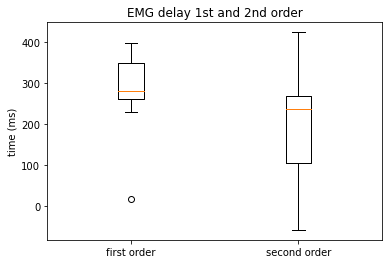

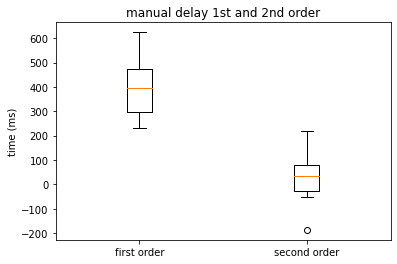

In [26]:
plt.boxplot([tau_fo_emg*1000,tau_so_emg*1000])
plt.title('EMG delay 1st and 2nd order')
plt.xticks([1,2],['first order','second order'])
plt.ylabel('time (ms)')

plt.figure()
plt.boxplot([tau_fo_man*1000,tau_so_man*1000])
plt.title('manual delay 1st and 2nd order')
plt.xticks([1,2],['first order','second order'])
plt.ylabel('time (ms)')
plt.show()

In [27]:
# bootstrap
import random
import scipy
def bootstrap(data):
           
    # then run bootstrap analysis
    blank = []
    for n in range(1000):
        blank.append(np.mean(random.choices(data,k=len(data))))
        
    ran = scipy.stats.norm.interval(alpha=0.95, loc=np.mean(blank), scale=np.std(blank))
        
    return ran

# bootstrapped invervals for our optimal values


# separate based on modality to make ttest easier
es = np.zeros((4,2)) # k1, t1, k2, t2
ms = np.zeros((4,2)) # k1, t1, k2, t2

# 1st order
es[0] = bootstrap(k_fo_emg) # k1 emg
es[1] = bootstrap(tau_fo_emg) # t1 emg
ms[0] = bootstrap(k_fo_man) # k1 man
ms[1] = bootstrap(tau_fo_man) # t1 man

#2nd order
es[2] = bootstrap(k_so_emg) # k2 emg
es[3] = bootstrap(tau_so_emg) # t2 emg
ms[2] = bootstrap(k_so_man) # k2 man
ms[3] = bootstrap(tau_so_man) # t2 man

print('EMG results:\n', es)
print('manual results:\n',ms)

EMG results:
 [[3.20033552 4.22827895]
 [0.22335214 0.33907417]
 [3.10635179 4.58018145]
 [0.107674   0.2672539 ]]
manual results:
 [[ 2.37867345  3.13769712]
 [ 0.32460051  0.45965332]
 [ 2.02401613  3.11626376]
 [-0.03174648  0.10023484]]


# plot open loop transfer function

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


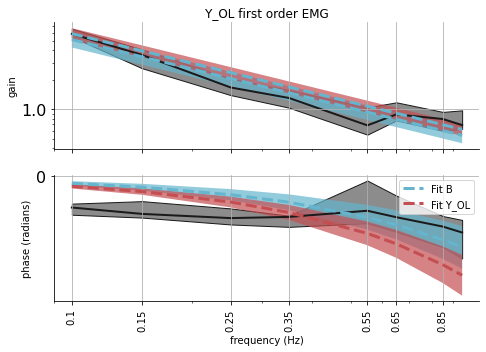

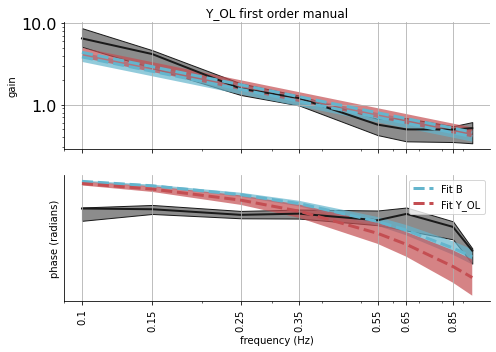

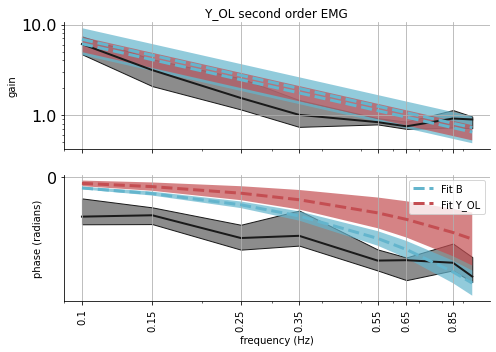

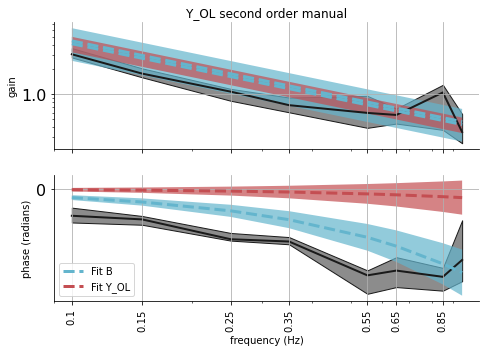

In [28]:
axs = bode_plot(data=(B_fo_emg*Mfo(s)), do_ylabels=True,title='Y_OL first order EMG')
axm,axp = axs
# plot fit B
axm.fill_between(freqs,abs(2.68345343/s),abs(3.78127066/s),facecolor='c',alpha=0.7)
axm.plot(freqs,abs(np.mean([2.68345343,3.78127066])/s),'c--',linewidth=3)
axp.plot(freqs,phaseshift+np.angle(np.exp(-s*np.mean([0.14200109, 0.26255312]))/s),'c--',linewidth=3,label='Fit B')
axp.fill_between(freqs,phaseshift+np.angle(np.exp(-s*0.14200109)/s),phaseshift+np.angle(np.exp(-s*0.26255312)/s),facecolor='c',alpha=0.7)
# plot linear fit Y_OL
axm.plot(freqs,abs(np.mean(es[0])/s),'c--',linewidth=3)
axm.fill_between(freqs,abs(es[0][0]/s),abs(es[0][1]/s),facecolor='r',alpha=0.7)
axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean(es[1]))/s)),'r--',linewidth=3,label='Fit Y_OL')
axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*es[1][0])/s)),np.unwrap(phaseshift+np.angle(np.exp(-s*es[1][1])/s)),facecolor='r',alpha=0.7)
plt.legend()

axs = bode_plot(data=(B_fo_man*Mfo(s)), do_ylabels=True,title='Y_OL first order manual')
axm,axp = axs
# plot fit B
axm.fill_between(freqs,abs(2.10705836/s),abs(2.74398982/s),facecolor='c',alpha=0.7)
axm.plot(freqs,abs(np.mean([2.10705836, 2.74398982])/s),'c--',linewidth=3)
axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean([0.28678275, 0.34320905]))/s)),'c--',linewidth=3,label='Fit B')
axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*0.28678275)/s)),np.unwrap(phaseshift+np.angle(np.exp(-s*0.34320905)/s)),facecolor='c',alpha=0.7)
# plot linear fit Y_OL
axm.plot(freqs,abs(np.mean(ms[0])/s),'c--',linewidth=3)
axm.fill_between(freqs,abs(ms[0][0]/s),abs(ms[0][1]/s),facecolor='r',alpha=0.7)
axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean(ms[1]))/s)),'r--',linewidth=3,label='Fit Y_OL')
axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*ms[1][0])/s)),np.unwrap(phaseshift+np.angle(np.exp(-s*ms[1][1])/s)),facecolor='r',alpha=0.7)
plt.legend()

axs = bode_plot(data=(B_so_emg*Mso(s)), do_ylabels=True,title='Y_OL second order EMG')
axm,axp = axs
axm.fill_between(freqs,abs(2.88912025/s),abs(5.72492779/s),facecolor='c',alpha=0.7)
axm.plot(freqs,abs(np.mean([2.88912025, 5.72492779])/s),'c--',linewidth=3)
axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean([0.28228069, 0.35794546]))/s)),'c--',linewidth=3,label='Fit B')
axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*0.28228069)/s)),np.unwrap(phaseshift+np.angle(np.exp(-s*0.35794546)/s)),facecolor='c',alpha=0.7)
# plot linear fit Y_OL
axm.plot(freqs,abs(np.mean(es[2])/s),'c--',linewidth=3)
axm.fill_between(freqs,abs(es[2][0]/s),abs(es[2][1]/s),facecolor='r',alpha=0.7)
axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean(es[3]))/s)),'r--',linewidth=3,label='Fit Y_OL')
axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*es[3][0])/s)),np.unwrap(phaseshift+np.angle(np.exp(-s*es[3][1])/s)),facecolor='r',alpha=0.7)
plt.legend()

axs = bode_plot(data=(B_so_man*Mso(s)), do_ylabels=True,title='Y_OL second order manual')
axm,axp = axs
axm.fill_between(freqs,abs(1.5965781 /s),abs(3.96807148/s),facecolor='c',alpha=0.7)
axm.plot(freqs,abs(np.mean([1.5965781 , 3.96807148])/s),'c--',linewidth=3)
axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean([0.2353949 , 0.41373575]))/s)),'c--',linewidth=3,label='Fit B')
axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*0.2353949 )/s)),np.unwrap(phaseshift+np.angle(np.exp(-s*0.41373575)/s)),facecolor='c',alpha=0.7)
# plot linear fit Y_OL
axm.plot(freqs,abs(np.mean(ms[2])/s),'c--',linewidth=3)
axm.fill_between(freqs,abs(ms[2][0]/s),abs(ms[2][1]/s),facecolor='r',alpha=0.7)
axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean(ms[3]))/s)),'r--',linewidth=3,label='Fit Y_OL')
axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*ms[3][0])/s)),np.unwrap(phaseshift+np.angle(np.exp(-s*ms[3][1])/s)),facecolor='r',alpha=0.7)
plt.legend()

plt.show()